In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

def generate_dataset():
    # Label 0: X ~ N([-1, -1], I)
    X_class0 = np.random.multivariate_normal(mean=[-1, -1], cov=np.eye(2), size=10)
    y_class0 = np.zeros((10, 1))
    
    # Label 1: X ~ N([1, 1], I)
    X_class1 = np.random.multivariate_normal(mean=[1, 1], cov=np.eye(2), size=10)
    y_class1 = np.ones((10, 1))
    
    
    X = np.vstack((X_class0, X_class1))
    y = np.vstack((y_class0, y_class1))
    
 
    indices = np.random.permutation(X.shape[0])
    X = X[indices]
    y = y[indices]
    
    
    train_size = X.shape[0] // 2
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    return X_train, y_train, X_test, y_test


In [21]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [22]:
X_train, y_train, X_test, y_test=generate_dataset()

# Initialize parameters 
w1 = np.random.randn(2, 1) * 0.01 
b1 = np.zeros((1, 1))                
w2 = np.random.randn(1, 1) * 0.01  
b2 = np.zeros((1, 1))           

# Learning rate and number of epochs are fixed (0.1, 1000 cycles).
p = 0.1      
epochs = 1000
loss_history = []


In [23]:
def MSE(y_pred, y_train):
    loss = np.mean((y_pred - y_train)**2)
    loss_history.append(loss)
    return loss

In [24]:
m = X_train.shape[0]

for i in range(epochs):
    # Forward pass
    z1 = X_train.dot(w1) + b1       
    a1 = sigmoid(z1)                
    z2 = a1.dot(w2) + b2            
    y_pred = z2                   

    # MSE loss
    loss = MSE(y_pred, y_train)

    # Backprop
    delta_k = (2/m) * (y_pred - y_train)      
    dw2 = a1.T.dot(delta_k)                   
    db2 = np.sum(delta_k, keepdims=True)      

    da1 = delta_k.dot(w2.T)                
    delta_j = da1 * (a1)*(1-a1)            # a1*(1-a1) => derivative of sigmoid

    dw1 = X_train.T.dot(delta_j)              
    db1 = np.sum(delta_j, keepdims=True)      

    # Gradient descent
    w2 -= p * dw2
    w1 -= p * dw1
    b2 -= p * db2
    b1 -= p * db1


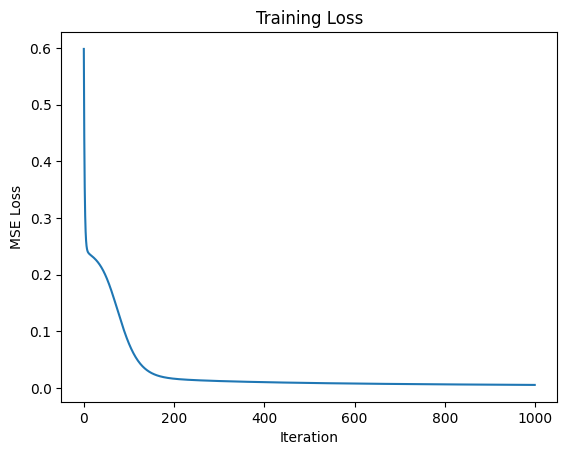

Test MSE: 0.13039


In [25]:
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# 7) Evaluate test MSE
z1_t = X_test.dot(w1) + b1
a1_t = sigmoid(z1_t)
z2_t = a1_t.dot(w2) + b2
y_test_pred = z2_t
test_mse = np.mean((y_test_pred - y_test)**2)
print(f"Test MSE: {test_mse:.5f}")